## 2,3,5 hidden layer architecture on MNIST dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist 
import seaborn as sns
from tensorflow.keras.initializers import he_normal

In [2]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
print("Number of X_train points :", X_train.shape)
print("Number of y_train points :", y_train.shape)
print("Number of X_test points :", X_test.shape)
print("Number of y_test points :", y_test.shape)

Number of X_train points : (60000, 28, 28)
Number of y_train points : (60000,)
Number of X_test points : (10000, 28, 28)
Number of y_test points : (10000,)


In [4]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [5]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [6]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [7]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [8]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [9]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = utils.to_categorical(y_train, 10) 
Y_test = utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
# some model parameters
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation 

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

## Two hidden layer

### MLP + ReLU + ADAM + BN + w/o Dropout +2Layer

In [11]:
from tensorflow.keras.layers import BatchNormalization
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.066, seed=None)

model_2lbn = Sequential() #2lbn=2 layer batch normalization

model_2lbn.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=initializer))
model_2lbn.add(BatchNormalization())

model_2lbn.add(Dense(128, activation='relu', kernel_initializer=initializer) )
model_2lbn.add(BatchNormalization())

model_2lbn.add(Dense(output_dim, activation='softmax'))


model_2lbn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [12]:
model_2lbn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2lbn.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1957 - accuracy: 0.9419 - val_loss: 0.0991 - val_accuracy: 0.9685
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0712 - accuracy: 0.9786 - val_loss: 0.0903 - val_accuracy: 0.9722
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0444 - accuracy: 0.9864 - val_loss: 0.0772 - val_accuracy: 0.9761
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0308 - accuracy: 0.9905 - val_loss: 0.0805 - val_accuracy: 0.9746
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0220 - accuracy: 0.9932 - val_loss: 0.0738 - val_accuracy: 0.9771
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.0890 - val_accuracy: 0.9739
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0201 - accuracy: 0.9932 - val_loss: 0.0699 - val_accuracy: 0.9784
Epoch 

In [13]:
#plotting function
%matplotlib notebook  
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    

Test score: 0.08280453830957413
Test accuracy: 0.9803000092506409


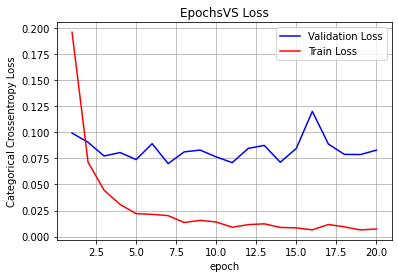

In [14]:
score = model_2lbn.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_title('EpochsVS Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### MLP + ReLU + ADAM + BN + with Dropout + 2Layer 

In [15]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
initializer = tf.keras.initializers.he_normal(seed=None)

model_2lbnd = Sequential() #model_2lbnd=2 layer batch normalization dropout

model_2lbnd.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=initializer))
model_2lbnd.add(BatchNormalization())
model_2lbnd.add(Dropout(0.5))

model_2lbnd.add(Dense(128, activation='relu', kernel_initializer=initializer) )
model_2lbnd.add(BatchNormalization())
model_2lbnd.add(Dropout(0.5))

model_2lbnd.add(Dense(output_dim, activation='softmax'))


model_2lbnd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [16]:
model_2lbnd.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2lbnd.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.4309 - accuracy: 0.8677 - val_loss: 0.1498 - val_accuracy: 0.9543
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2066 - accuracy: 0.9382 - val_loss: 0.1077 - val_accuracy: 0.9664
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1592 - accuracy: 0.9523 - val_loss: 0.0920 - val_accuracy: 0.9704
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1346 - accuracy: 0.9592 - val_loss: 0.0813 - val_accuracy: 0.9739
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1214 - accuracy: 0.9624 - val_loss: 0.0754 - val_accuracy: 0.9764
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1101 - accuracy: 0.9665 - val_loss: 0.0685 - val_accuracy: 0.9779
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1000 - accuracy: 0.9691 - val_loss: 0.0674 - val_accuracy: 0.9784

Test score: 0.05603070184588432
Test accuracy: 0.9840999841690063


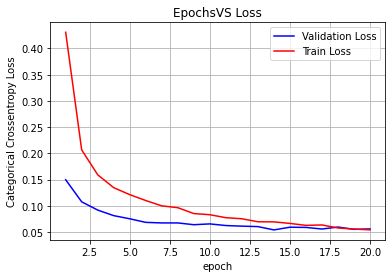

In [17]:
score = model_2lbnd.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_title('EpochsVS Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Three hidden layer

### MLP + ReLU + ADAM + w/o Dropout + BN + 3Layer

In [ ]:

initializer = tf.keras.initializers.he_normal(seed=None)

model_3lbn = Sequential()

model_3lbn.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=initializer)) #layer 1
model_3lbn.add(BatchNormalization())

model_3lbn.add(Dense(128, activation='relu', kernel_initializer=initializer) )  #layer 2
model_3lbn.add(BatchNormalization())

model_3lbn.add(Dense(100, activation='relu', kernel_initializer=initializer) ) #layer 3
model_3lbn.add(BatchNormalization())

model_3lbn.add(Dense(output_dim, activation='softmax'))


model_3lbn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 100)               12900     
_________________________________________________________________
batch_normalization_11 (Batc (None, 100)               400       
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [ ]:
model_3lbn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3lbn.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2015 - accuracy: 0.9404 - val_loss: 0.1005 - val_accuracy: 0.9681
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0771 - accuracy: 0.9771 - val_loss: 0.0931 - val_accuracy: 0.9692
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0515 - accuracy: 0.9839 - val_loss: 0.0780 - val_accuracy: 0.9769
Epoch 4/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.0854 - val_accuracy: 0.9735
Epoch 5/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0879 - val_accuracy: 0.9750
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0296 - accuracy: 0.9899 - val_loss: 0.0742 - val_accuracy: 0.9777
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.0661 - val_accuracy: 0.9820

Test score: 0.105586476624012
Test accuracy: 0.9764000177383423


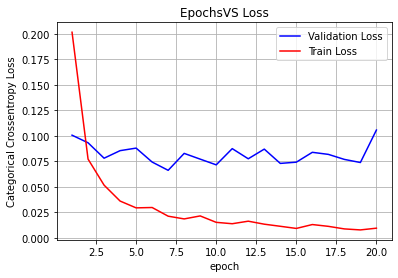

In [ ]:
score = model_3lbn.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_title('EpochsVS Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### MLP + ReLU + ADAM + with Dropout + BN + 3Layer

In [ ]:
initializer = tf.keras.initializers.he_normal(seed=None)

model_3lbnd = Sequential()

model_3lbnd.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=initializer)) #layer 1
model_3lbnd.add(BatchNormalization())
model_3lbnd.add(Dropout(0.5))

model_3lbnd.add(Dense(128, activation='relu', kernel_initializer=initializer) )  #layer 2
model_3lbnd.add(BatchNormalization())
model_3lbnd.add(Dropout(0.5))

model_3lbnd.add(Dense(100, activation='relu', kernel_initializer=initializer) ) #layer 3
model_3lbnd.add(BatchNormalization())
model_3lbnd.add(Dropout(0.5))

model_3lbnd.add(Dense(output_dim, activation='softmax'))


model_3lbnd.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_13 (Batc (None, 128)               512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)              

In [ ]:
model_3lbnd.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3lbnd.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 6s 14ms/step - loss: 0.6442 - accuracy: 0.8026 - val_loss: 0.1844 - val_accuracy: 0.9415
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2782 - accuracy: 0.9201 - val_loss: 0.1235 - val_accuracy: 0.9622
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2113 - accuracy: 0.9397 - val_loss: 0.1121 - val_accuracy: 0.9654
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1809 - accuracy: 0.9477 - val_loss: 0.0980 - val_accuracy: 0.9702
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1580 - accuracy: 0.9547 - val_loss: 0.0909 - val_accuracy: 0.9727
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1457 - accuracy: 0.9582 - val_loss: 0.0815 - val_accuracy: 0.9754
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1275 - accuracy: 0.9631 - val_loss: 0.0784 - val_accuracy: 0.9764

Test score: 0.06718681752681732
Test accuracy: 0.9817000031471252


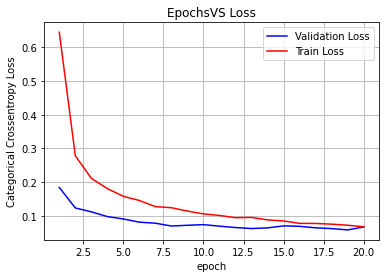

In [ ]:
score = model_3lbnd.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_title('EpochsVS Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Five hidden layer

### MLP + ReLU + ADAM + w/o Dropout + BN + 5Layer 

In [ ]:
initializer = tf.keras.initializers.he_normal(seed=None)

model_5lbn = Sequential()

model_5lbn.add(Dense(612, activation='relu', input_shape=(input_dim,), kernel_initializer=initializer)) #layer 1
model_5lbn.add(BatchNormalization())

model_5lbn.add(Dense(512, activation='relu', kernel_initializer=initializer) )  #layer 2
model_5lbn.add(BatchNormalization())

model_5lbn.add(Dense(312, activation='relu', kernel_initializer=initializer) ) #layer 3
model_5lbn.add(BatchNormalization())

model_5lbn.add(Dense(212, activation='relu', kernel_initializer=initializer) ) #layer 3
model_5lbn.add(BatchNormalization())

model_5lbn.add(Dense(15, activation='relu', kernel_initializer=initializer) ) #layer 3
model_5lbn.add(BatchNormalization())

model_5lbn.add(Dense(output_dim, activation='softmax'))


model_5lbn.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 612)               480420    
_________________________________________________________________
batch_normalization_25 (Batc (None, 612)               2448      
_________________________________________________________________
dense_35 (Dense)             (None, 512)               313856    
_________________________________________________________________
batch_normalization_26 (Batc (None, 512)               2048      
_________________________________________________________________
dense_36 (Dense)             (None, 312)               160056    
_________________________________________________________________
batch_normalization_27 (Batc (None, 312)               1248      
_________________________________________________________________
dense_37 (Dense)             (None, 212)             

In [ ]:
model_5lbn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_5lbn.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 13s 27ms/step - loss: 0.2785 - accuracy: 0.9367 - val_loss: 0.1278 - val_accuracy: 0.9626
Epoch 2/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0934 - accuracy: 0.9739 - val_loss: 0.0922 - val_accuracy: 0.9724
Epoch 3/20
469/469 [==============================] - 12s 27ms/step - loss: 0.0626 - accuracy: 0.9814 - val_loss: 0.0797 - val_accuracy: 0.9764
Epoch 4/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0506 - accuracy: 0.9841 - val_loss: 0.0730 - val_accuracy: 0.9774
Epoch 5/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0405 - accuracy: 0.9875 - val_loss: 0.0735 - val_accuracy: 0.9786
Epoch 6/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0332 - accuracy: 0.9893 - val_loss: 0.0881 - val_accuracy: 0.9756
Epoch 7/20
469/469 [==============================] - 13s 28ms/step - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.0840 - val_accuracy:

Test score: 0.0679909959435463
Test accuracy: 0.9822999835014343


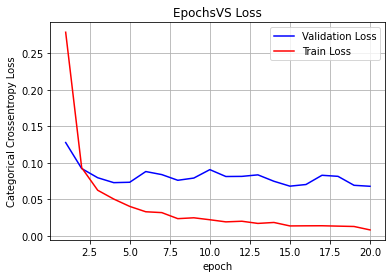

In [ ]:
score = model_5lbn.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_title('EpochsVS Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### MLP + ReLU + ADAM +  BN + with Dropout + 5Layer

In [ ]:
initializer = tf.keras.initializers.he_normal(seed=None)

model_5lbnd = Sequential()

model_5lbnd.add(Dense(612, activation='relu', input_shape=(input_dim,), kernel_initializer=initializer)) #layer 1
model_5lbnd.add(BatchNormalization())
model_5lbnd.add(Dropout(0.5))

model_5lbnd.add(Dense(512, activation='relu', kernel_initializer=initializer) )  #layer 2
model_5lbnd.add(BatchNormalization())
model_5lbnd.add(Dropout(0.5))

model_5lbnd.add(Dense(312, activation='relu', kernel_initializer=initializer) ) #layer 3
model_5lbnd.add(BatchNormalization())
model_5lbnd.add(Dropout(0.5))

model_5lbnd.add(Dense(212, activation='relu', kernel_initializer=initializer) ) #layer 3
model_5lbnd.add(BatchNormalization())
model_5lbnd.add(Dropout(0.5))

model_5lbnd.add(Dense(15, activation='relu', kernel_initializer=initializer) ) #layer 3
model_5lbnd.add(BatchNormalization())
model_5lbnd.add(Dropout(0.5))

model_5lbnd.add(Dense(output_dim, activation='softmax'))


model_5lbnd.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 612)               480420    
_________________________________________________________________
batch_normalization_20 (Batc (None, 612)               2448      
_________________________________________________________________
dropout_5 (Dropout)          (None, 612)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               313856    
_________________________________________________________________
batch_normalization_21 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 312)              

In [ ]:
model_5lbnd.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_5lbnd.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 14s 30ms/step - loss: 1.2392 - accuracy: 0.6089 - val_loss: 0.2686 - val_accuracy: 0.9285
Epoch 2/20
469/469 [==============================] - 14s 29ms/step - loss: 0.5216 - accuracy: 0.8631 - val_loss: 0.1697 - val_accuracy: 0.9544
Epoch 3/20
469/469 [==============================] - 14s 29ms/step - loss: 0.3929 - accuracy: 0.8996 - val_loss: 0.1406 - val_accuracy: 0.9638
Epoch 4/20
469/469 [==============================] - 14s 29ms/step - loss: 0.3270 - accuracy: 0.9171 - val_loss: 0.1339 - val_accuracy: 0.9666
Epoch 5/20
469/469 [==============================] - 13s 28ms/step - loss: 0.2912 - accuracy: 0.9244 - val_loss: 0.1182 - val_accuracy: 0.9699
Epoch 6/20
469/469 [==============================] - 13s 29ms/step - loss: 0.2621 - accuracy: 0.9315 - val_loss: 0.1154 - val_accuracy: 0.9740
Epoch 7/20
469/469 [==============================] - 14s 29ms/step - loss: 0.2509 - accuracy: 0.9339 - val_loss: 0.1091 - val_accuracy:

Test score: 0.08210139721632004
Test accuracy: 0.9828000068664551


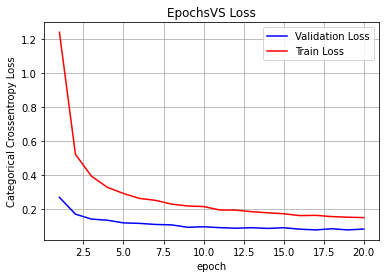

In [ ]:
score = model_5lbnd.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_title('EpochsVS Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Conclusion

In [1]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["No. of layer","Dropout", "Accuracy %"]

x.add_row(["2","NO","98.03"])
x.add_row(["2","YES","98.40"])
x.add_row(["3","NO","97.76"])
x.add_row(["3","YES","98.17"])
x.add_row(["5","NO","98.22"])
x.add_row(["5","YES","98.28"])


print(x)

+--------------+---------+------------+
| No. of layer | Dropout | Accuracy % |
+--------------+---------+------------+
|      2       |    NO   |   98.03    |
|      2       |   YES   |   98.40    |
|      3       |    NO   |   97.76    |
|      3       |   YES   |   98.17    |
|      5       |    NO   |   98.22    |
|      5       |   YES   |   98.28    |
+--------------+---------+------------+


1. Observed that using dropouts there is slight increasein the accuracy 
2. 5 hidden layer model has given 98% accuracy and no much increment with/without dropout as dataset is small